# Titanic Data Cleaning and Analysis

In [90]:
import csv
import pandas as pd
import statistics as stat
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import CSV file

In [37]:
data=pd.read_csv('titanic1.csv')

## printdata

In [38]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
data.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## finding shape of data

In [40]:
data.shape

(418, 11)

In [41]:
print("Number of rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of rows 418
Number of Columns 11


## Information of data

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Findng Missing value if available

In [43]:
print("Any missing Value? ", data.isnull().values.any())

Any missing Value?  True


In [45]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Null values heat map

<AxesSubplot:>

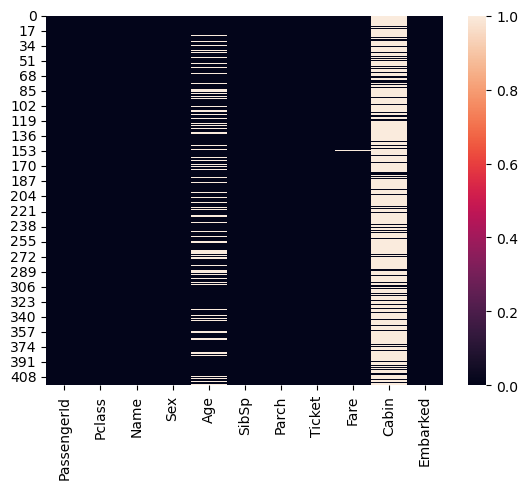

In [46]:
sns.heatmap(data.isnull())

# Percentile of null values

In [49]:
per=data.isnull().sum()*100/len(data)

In [50]:
print(per)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [55]:
data.dropna(axis=0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


# Removing all Null values

In [56]:
data.dropna(inplace=True)

In [110]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

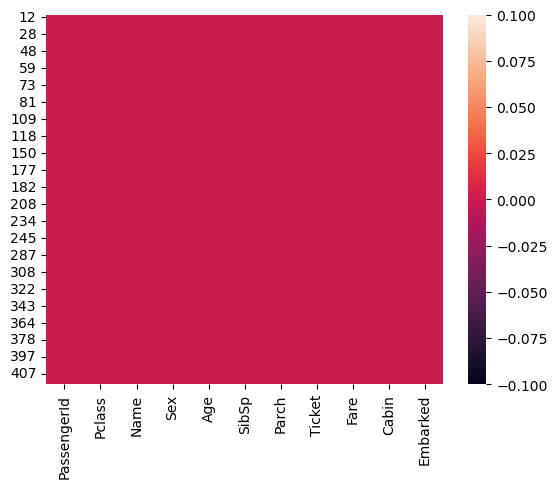

In [111]:
sns.heatmap(data.isnull())

In [59]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


# Finding Duplicate data

In [60]:
dup=data.duplicated().any()

In [61]:
print(dup)

False


# If available then remove but there are no duplicate values

# data=data.drop_duplicates()

# Here are describe all numerical values calculations mean, count, std, min ,max and more

In [63]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,3.000000,76.000000,3.000000,4.000000,512.329200


## when we use include all it is work with all columns which are numericals or not

In [65]:
data.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,87.000000,87.000000,87,87,87.000000,87.000000,87.000000,87,87.000000,87,87
unique,NaN,NaN,87,2,NaN,NaN,NaN,66,NaN,72,3
top,NaN,NaN,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,NaN,NaN,NaN,113503,NaN,B57 B59 B63 B66,C
freq,NaN,NaN,1,44,NaN,NaN,NaN,4,NaN,3,47
mean,1102.712644,1.137931,NaN,NaN,39.247126,0.597701,0.482759,NaN,98.109198,NaN,NaN
std,126.751901,0.435954,NaN,NaN,15.218730,0.637214,0.860801,NaN,88.177319,NaN,NaN
min,904.000000,1.000000,NaN,NaN,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,986.000000,1.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,35.339600,NaN,NaN
50%,1094.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,71.283300,NaN,NaN
75%,1216.000000,1.000000,NaN,NaN,50.000000,1.000000,1.000000,NaN,135.066650,NaN,NaN


## All columns of dataset

In [66]:
data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Groupby mean of age and fare

In [69]:
data.groupby('Age')['Fare'].mean()

Age
1.0      16.700000
6.0     134.500000
12.0     39.000000
13.0    262.375000
18.0     56.550000
18.5     13.000000
20.0     13.862500
22.0     36.239600
23.0     86.308333
24.0     71.133350
25.0     23.440300
26.0     74.889600
27.0    145.433333
28.0    263.000000
28.5     27.720800
29.0    221.779200
30.0    100.041675
31.0     81.518750
32.5    211.500000
33.0     27.720800
35.0    134.625000
36.0    102.073975
37.0     86.579150
39.0     69.961100
41.0     41.181250
42.0     34.525000
43.0     41.581250
45.0     70.028125
46.0     75.241700
47.0    144.350000
48.0    124.623950
49.0      0.000000
50.0    149.666667
51.0     39.400000
53.0     55.179150
54.0     68.650000
55.0     76.208325
57.0    146.520800
58.0    512.329200
59.0     51.479200
60.0    169.645850
61.0    262.375000
63.0    221.779200
64.0     61.652767
67.0    221.779200
76.0     78.850000
Name: Fare, dtype: float64

### Groupby mean of age and fare and sorting

In [71]:
data.groupby('Age')['Fare'].mean().sort_values(ascending=False)

Age
58.0    512.329200
28.0    263.000000
13.0    262.375000
61.0    262.375000
29.0    221.779200
67.0    221.779200
63.0    221.779200
32.5    211.500000
60.0    169.645850
50.0    149.666667
57.0    146.520800
27.0    145.433333
47.0    144.350000
35.0    134.625000
6.0     134.500000
48.0    124.623950
36.0    102.073975
30.0    100.041675
37.0     86.579150
23.0     86.308333
31.0     81.518750
76.0     78.850000
55.0     76.208325
46.0     75.241700
26.0     74.889600
24.0     71.133350
45.0     70.028125
39.0     69.961100
54.0     68.650000
64.0     61.652767
18.0     56.550000
53.0     55.179150
59.0     51.479200
43.0     41.581250
41.0     41.181250
51.0     39.400000
12.0     39.000000
22.0     36.239600
42.0     34.525000
33.0     27.720800
28.5     27.720800
25.0     23.440300
1.0      16.700000
20.0     13.862500
18.5     13.000000
49.0      0.000000
Name: Fare, dtype: float64

## Bar plot between age and fare

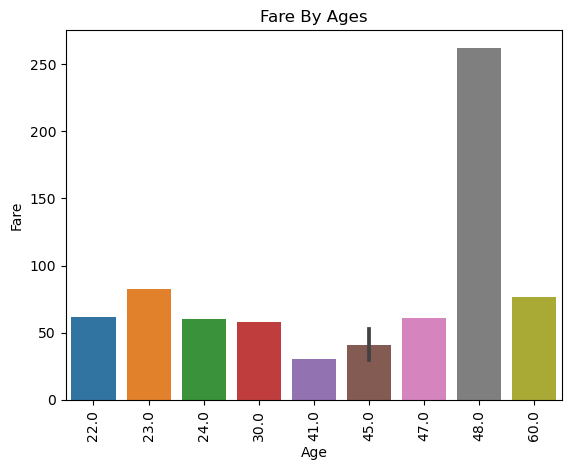

In [74]:
sns.barplot(x='Age', y='Fare',data=data.head(10))
plt.title("Fare By Ages")
plt.xticks(rotation=90)
plt.show()

In [75]:
data.groupby('Pclass')['Fare'].mean().sort_values(ascending=False)

Pclass
1    107.378955
2     21.393750
3     10.526400
Name: Fare, dtype: float64

### Barplot between class and fare

<function matplotlib.pyplot.show(close=None, block=None)>

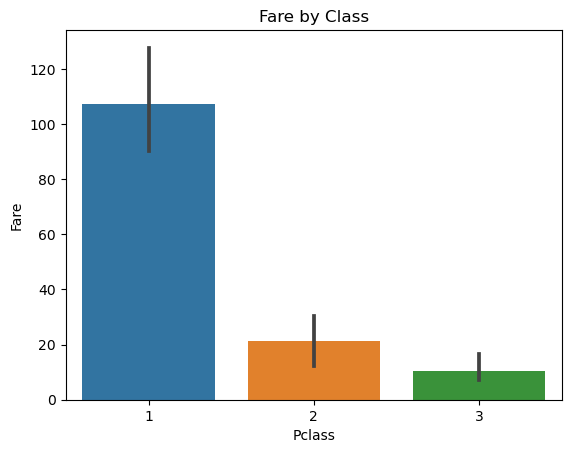

In [78]:
sns.barplot(x='Pclass',y='Fare',data=data)
plt.title("Fare by Class")
plt.show

### all numerical columns data histogram are present in dataset

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

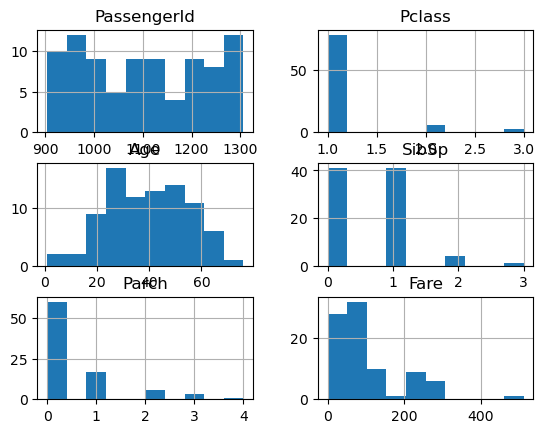

In [82]:
data.hist()

In [83]:
age=data['Age']
fare=data['Fare']
pc=data['Pclass']

(array([ 2.,  2.,  9., 17., 12., 13., 14., 11.,  6.,  1.]),
 array([ 1. ,  8.5, 16. , 23.5, 31. , 38.5, 46. , 53.5, 61. , 68.5, 76. ]),
 <BarContainer object of 10 artists>)

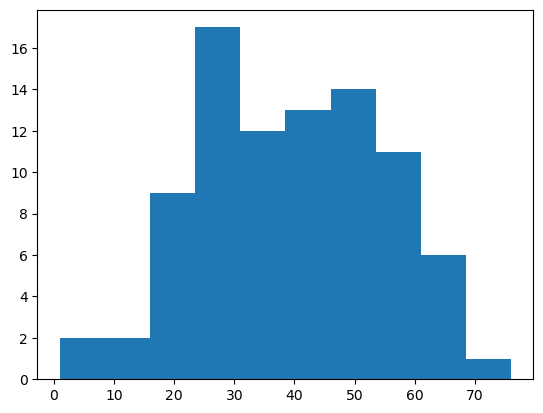

In [86]:
plt.hist(age)

(array([28., 32., 10.,  1.,  9.,  6.,  0.,  0.,  0.,  1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

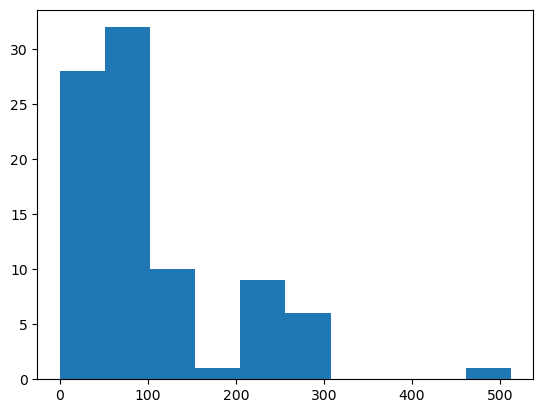

In [87]:
plt.hist(fare)

(array([78.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  3.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

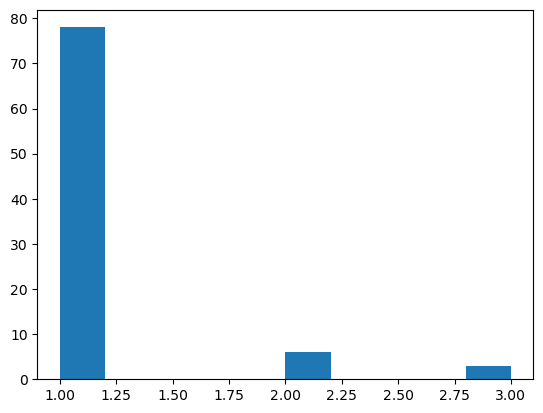

In [88]:
plt.hist(pc)

In [91]:
age_mean=stat.mean(age)
fare_mean=stat.mean(fare)
class_mean=stat.mean(pc)

In [92]:
age_st=stat.stdev(age)
fare_st=stat.stdev(fare)
class_st=stat.stdev(pc)

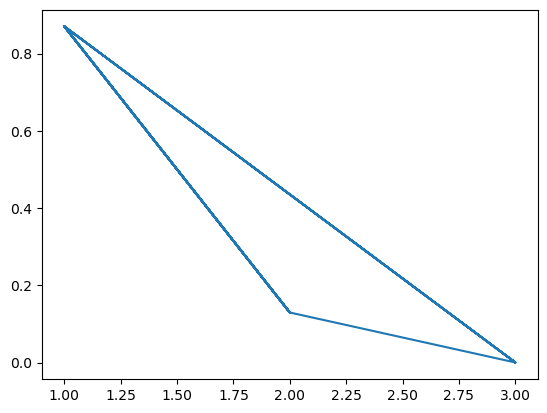

In [95]:
plt.plot(pc,norm.pdf(pc,class_mean,class_st))

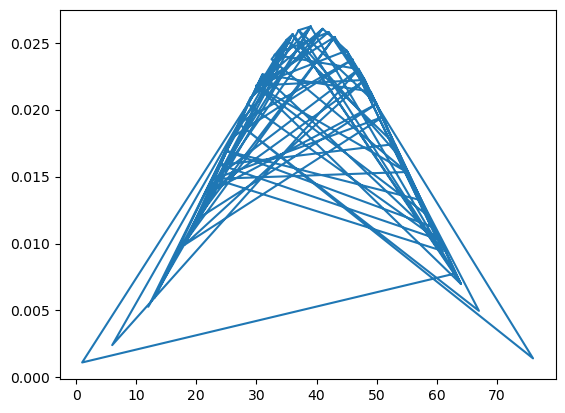

In [96]:
plt.plot(age,norm.pdf(age,age_mean,age_st))

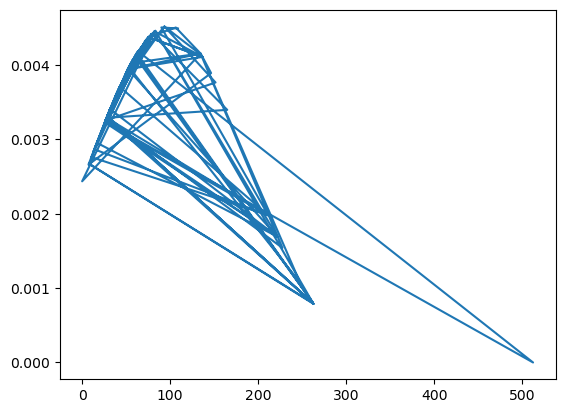

In [97]:
plt.plot(fare,norm.pdf(fare,fare_mean,fare_st))

In [98]:
data_cor=data.corr()

In [99]:
print(data_cor)

             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000  0.004934  0.055488 -0.087828 -0.122551 -0.097346
Pclass          0.004934  1.000000 -0.410924 -0.132790  0.006411 -0.298186
Age             0.055488 -0.410924  1.000000  0.062530  0.051144  0.180567
SibSp          -0.087828 -0.132790  0.062530  1.000000  0.252194  0.213014
Parch          -0.122551  0.006411  0.051144  0.252194  1.000000  0.395685
Fare           -0.097346 -0.298186  0.180567  0.213014  0.395685  1.000000


(array([[0., 0., 4., 1., 0., 0., 0., 0., 0., 1.],
        [2., 1., 2., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 3., 1., 0., 0., 0., 0., 1.],
        [0., 1., 1., 1., 2., 0., 0., 0., 0., 1.],
        [0., 0., 2., 1., 1., 1., 0., 0., 0., 1.],
        [1., 0., 1., 0., 2., 1., 0., 0., 0., 1.]]),
 array([-0.41092369, -0.26983132, -0.12873895,  0.01235341,  0.15344578,
         0.29453815,  0.43563052,  0.57672289,  0.71781526,  0.85890763,
         1.        ]),
 <a list of 6 BarContainer objects>)

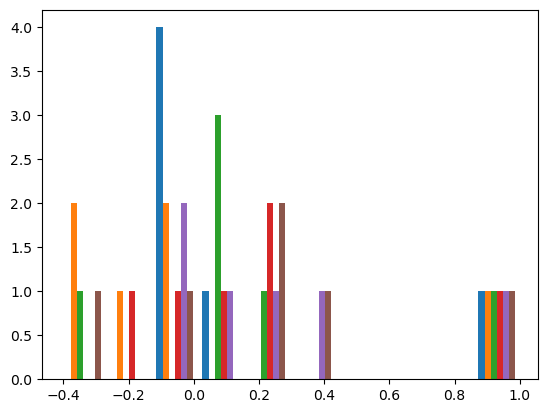

In [100]:
plt.hist(data_cor)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

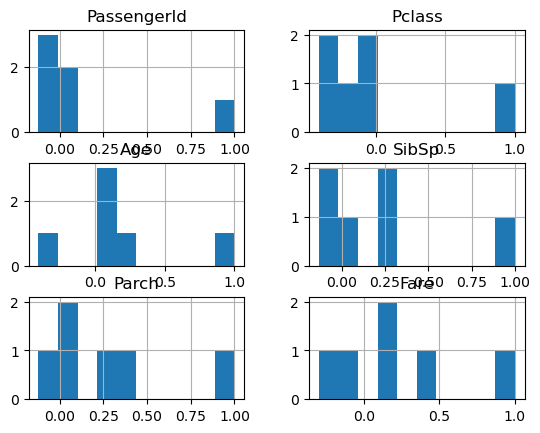

In [101]:
data_cor.hist()

## Scatterplot of age and fare by class wise

<AxesSubplot:xlabel='Age', ylabel='Fare'>

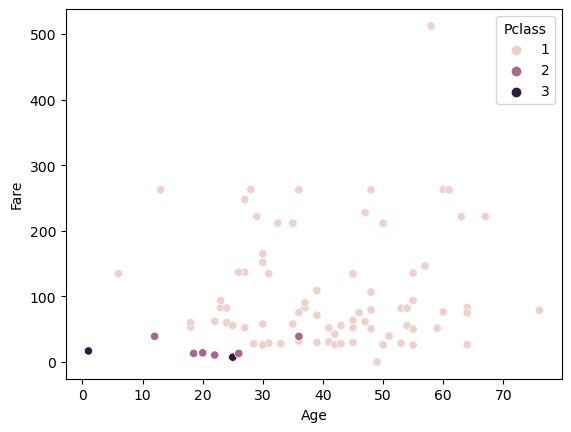

In [105]:
sns.scatterplot(x='Age',y='Fare',data=data,hue="Pclass")

<AxesSubplot:>

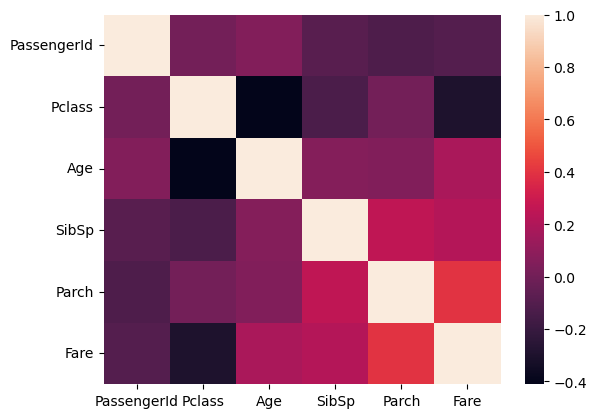

In [106]:
sns.heatmap(data_cor)